In [3]:
library(deSolve)
library(ggplot2)

# SIR model function
sir_model <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- -beta * S * I / N
    dI <- beta * S * I / N - gamma * I
    dR <- gamma * I
    return(list(c(dS, dI, dR)))
  })
}

In [11]:
# Set parameters
parameters <- c(beta = 0.3, gamma = 0.1)
state <- c(S = 999, I = 1, R = 0)
times <- seq(0, 365, by = 1)
N <- sum(state)


In [13]:
# Solve the differential equations
out <- ode(y = state, times = times, func = sir_model, parms = parameters)
df <- as.data.frame(out)

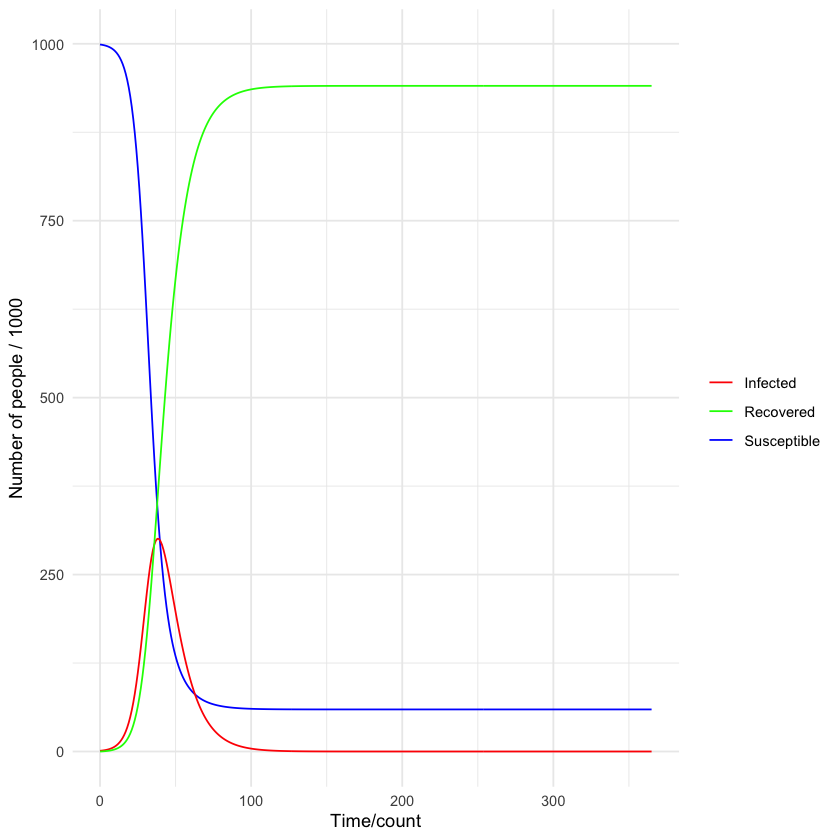

In [15]:
# Plot
ggplot(df, aes(x = time)) +
  geom_line(aes(y = S, color = "Susceptible")) +
  geom_line(aes(y = I, color = "Infected")) +
  geom_line(aes(y = R, color = "Recovered")) +
  scale_color_manual(values = c("Susceptible" = "blue", "Infected" = "red", "Recovered" = "green")) +
  labs(x = "Time/count", y = "Number of people / 1000", color = "") +
  theme_minimal() +
  theme(legend.position = "right")

In [ ]:
sirv_model <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    
    N <- S + I + R + V
    
    vacc_rate <- ifelse(time >= vaccine_start,
                        vaccine_coverage / vaccine_duration,
                        0)
    
    dS <- -beta * S * I / N - vacc_rate * S
    dI <- beta * S * I / N - gamma * I
    dR <- gamma * I
    dV <- vacc_rate * S
    
    return(list(c(dS, dI, dR, dV)))
  })
}

In [ ]:
initial_state <- c(
  S = 99000,
  I = 1000,
  R = 0,
  V = 0
)

times <- seq(0, 180, by = 1)

# differnt start days
start_days <- c(10, 20, 30,
                40, 50, 60,
                70, 80, 90,
                100, 110, 120,
                130, 140, 150,
                160, 170, 180)


In [ ]:
# for loop
all_outputs <- data.frame()
for(i in start_days) {
  
  parameters <- c(
    beta = 0.3,
    gamma = 1/7,
    vaccine_start = i,
    vaccine_coverage = 0.5,
    vaccine_duration = 14
  )
  
  out <- as.data.frame(ode(y = initial_state, times = times, func = sirv_model, parms = parameters))
  
  all_outputs <- rbind(all_outputs, 
                       data.frame(time = out$time,
                                  I = out$I,
                                  vaccine_start = i))
}


In [ ]:
ggplot(all_outputs)+
  geom_line(aes(x = time, y = I, color = as.factor(vaccine_start)))+
  theme_minimal()